<a href="https://colab.research.google.com/github/Reyhaneh2001/academic_success_forecasting/blob/main/AcademicSuccessForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import SMOTE
from keras.layers import Dense, Dropout, BatchNormalization
from keras.initializers import HeNormal
from xgboost import XGBRegressor
from tensorflow.keras.callbacks import EarlyStopping
sns.set(style="whitegrid")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving student-por.csv to student-por.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['student-por.csv']))

In [8]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
423,MS,F,16,U,GT3,T,1,3,at_home,other,...,4,3,3,1,3,5,11,10,11,11
430,MS,M,16,U,GT3,A,1,2,other,other,...,4,4,3,1,1,5,0,10,11,11
304,GP,F,18,U,GT3,T,2,2,at_home,services,...,4,3,3,1,1,3,0,11,12,13
548,MS,F,17,U,GT3,A,1,1,at_home,at_home,...,4,5,5,1,2,3,2,11,10,11
397,GP,F,17,U,GT3,A,2,2,at_home,at_home,...,3,3,1,1,2,4,18,10,12,14
417,GP,F,18,U,GT3,T,3,2,at_home,other,...,4,3,4,1,2,2,5,14,17,17
338,GP,F,17,R,LE3,T,3,1,services,other,...,3,1,2,1,1,3,0,18,19,19
358,GP,F,18,U,LE3,T,4,3,health,services,...,3,2,4,1,4,1,8,12,12,15
439,MS,F,15,R,GT3,T,3,3,other,services,...,4,1,3,1,1,4,0,14,16,16
300,GP,F,18,U,GT3,T,4,3,services,other,...,3,1,2,1,3,2,2,15,15,15


In [9]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [15]:
df.iloc[:, 9:25]

,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime
0,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3
1,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3
2,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3
3,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2
4,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4
645,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3
646,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1
647,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4


**Failures count by gender**

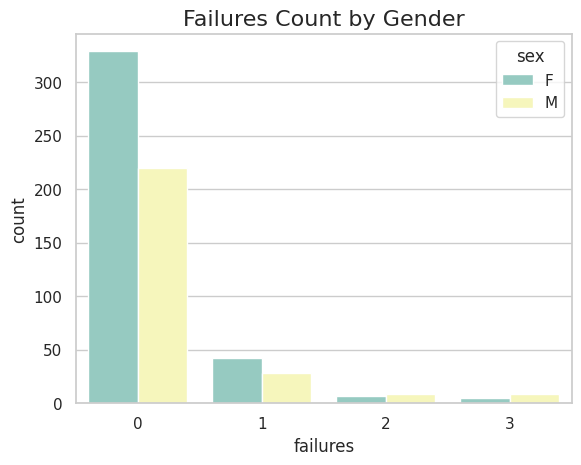

In [16]:
sns.countplot(x='failures', hue='sex', data=df, palette="Set3")
plt.title("Failures Count by Gender", fontsize=16)
plt.show()

**Absence vs final grade**

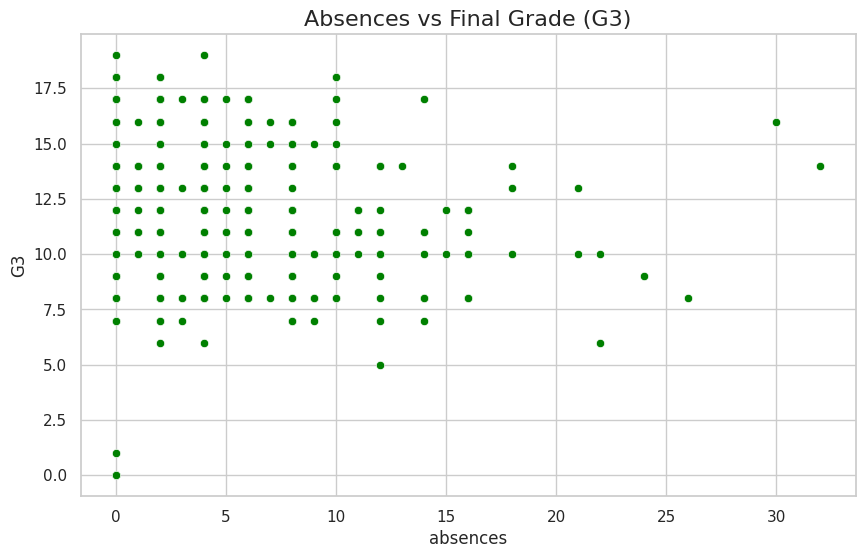

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='absences', y='G3', data=df, color="green")
plt.title("Absences vs Final Grade (G3)", fontsize=16)
plt.show()

**Age vs final grade**

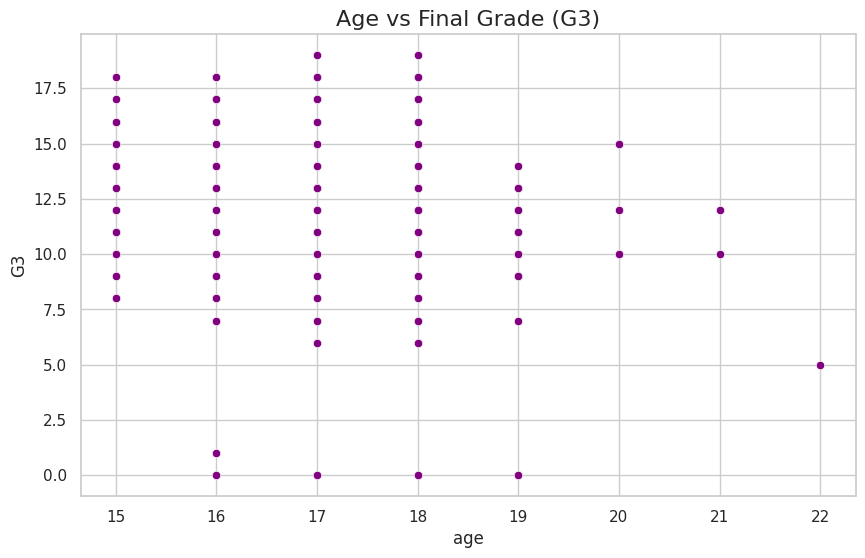

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='G3', data=df, color="purple", marker="o")
plt.title("Age vs Final Grade (G3)", fontsize=16)
plt.show()

**Study Time vs Final Grade (G3) by Gender**

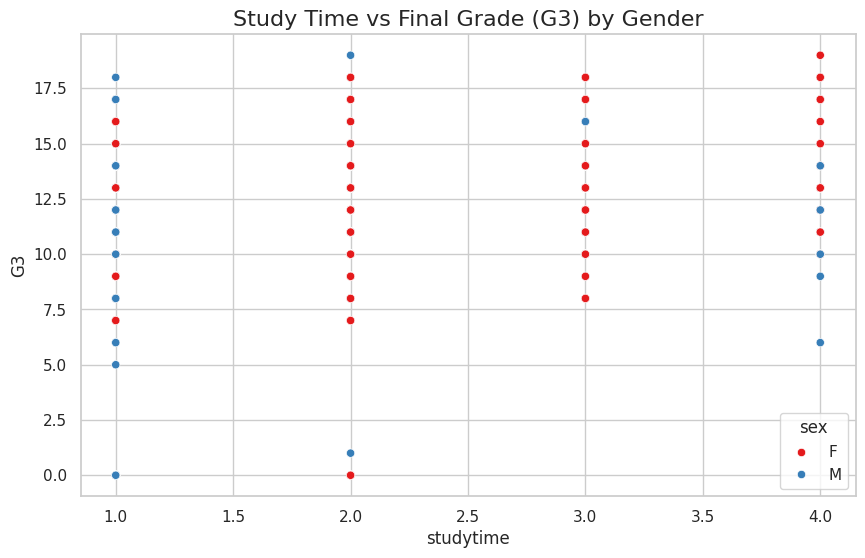

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='studytime', y='G3', hue='sex', data=df, palette="Set1")
plt.title("Study Time vs Final Grade (G3) by Gender", fontsize=16)
plt.show()

**Final Grade (G3) Distribution by Guardian Status**

<ipython-input-22-fe9f1053cfe0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='guardian', y='G3', data=df, palette="Set1")


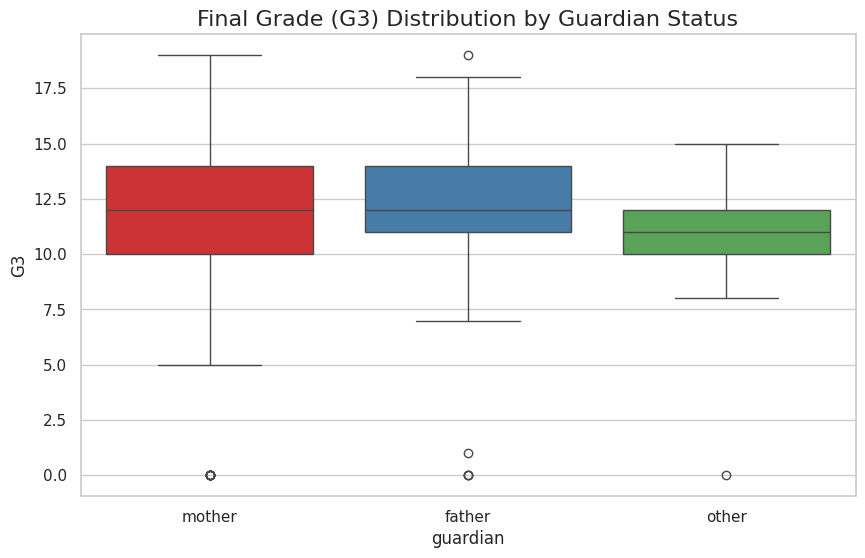

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='guardian', y='G3', data=df, palette="Set1")
plt.title("Final Grade (G3) Distribution by Guardian Status", fontsize=16)
plt.show()

# **Encode features**

In [34]:
# Binary encoding for yes/no columns
binary_cols = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})

# One-hot encoding for categorical columns
categorical_cols = ['guardian', 'reason', 'Fjob', 'Mjob', 'Pstatus', 'famsize', 'address', 'sex', 'school']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [31]:
df.sample(10)

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob_teacher,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Pstatus_T,famsize_LE3,address_U,sex_M,school_MS
418,18,2,3,1,1,0,0,0,0,0,...,False,False,True,False,False,True,False,False,True,False
491,19,1,1,2,2,1,0,1,0,0,...,False,False,True,False,False,True,False,True,False,True
267,17,4,3,2,2,0,0,0,0,1,...,False,True,False,False,False,True,True,True,True,False
444,16,3,4,3,2,0,0,0,0,0,...,False,False,True,False,False,True,False,False,True,True
611,18,2,2,2,3,0,0,0,0,0,...,False,False,False,True,False,True,False,False,False,True
380,17,4,4,1,3,0,0,1,0,1,...,False,False,False,False,True,True,False,True,False,False
623,18,4,4,2,3,0,0,0,0,0,...,False,False,False,False,True,True,True,True,True,True
630,18,4,4,2,3,0,0,0,0,0,...,False,False,True,False,False,True,True,False,False,True
299,20,2,1,2,2,0,0,1,1,1,...,False,False,True,False,False,True,False,False,False,False
325,17,4,1,2,1,0,0,0,0,1,...,False,False,False,True,False,False,True,True,True,False


# **Preprocessing**

In [35]:
# Define features and target
X = df.drop(columns=["G3"])
y = df["G3"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Build, compile and fit model**

In [36]:
# Build the model
initializer = HeNormal()
model = Sequential([
    Dense(128, activation='relu', kernel_initializer=initializer, input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu', kernel_initializer=initializer),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu', kernel_initializer=initializer),
    Dropout(0.2),

    Dense(1)  # regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 155.4100 - mae: 11.8769 - val_loss: 160.6206 - val_mae: 12.4176
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 141.8253 - mae: 11.4177 - val_loss: 145.0046 - val_mae: 11.8135
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 123.1428 - mae: 10.6151 - val_loss: 130.2837 - val_mae: 11.2050
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 108.7617 - mae: 9.9879 - val_loss: 115.3130 - val_mae: 10.5471
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 94.8566 - mae: 9.2265 - val_loss: 99.9050 - val_mae: 9.8179
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 81.6465 - mae: 8.5683 - val_loss: 84.4672 - val_mae: 9.0145
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 63.5966 - mae: 7.4661 - val_loss: 68.8938 - val_mae: 8.0975
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 51.0974 - mae: 6.5305 - val_loss: 54.1435 - val_mae: 7.0827
Epoch 9/200
13/13 ━━━━━━━━━━━

# **Evaluation and plots**

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Test MSE: 3.9865
Test R^2 Score: 0.5912


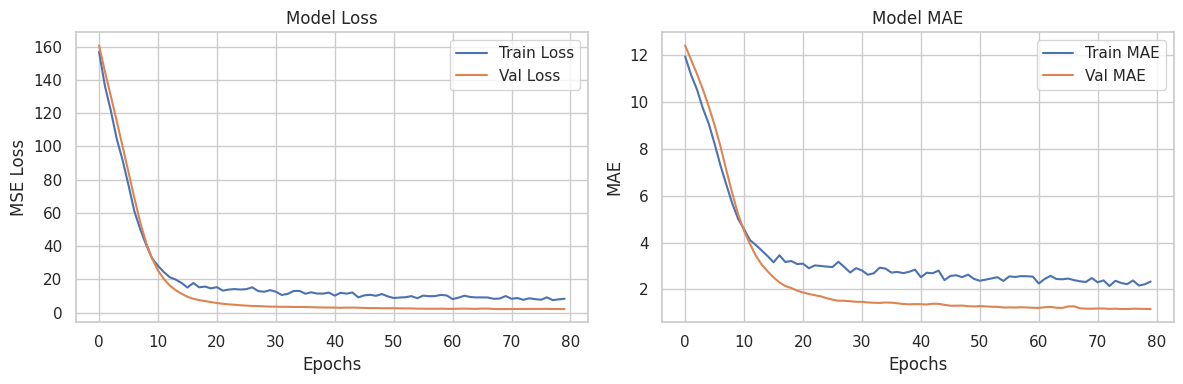

In [40]:
# Evaluation
y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2 Score: {r2:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Model Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Model MAE')

plt.tight_layout()
plt.show()

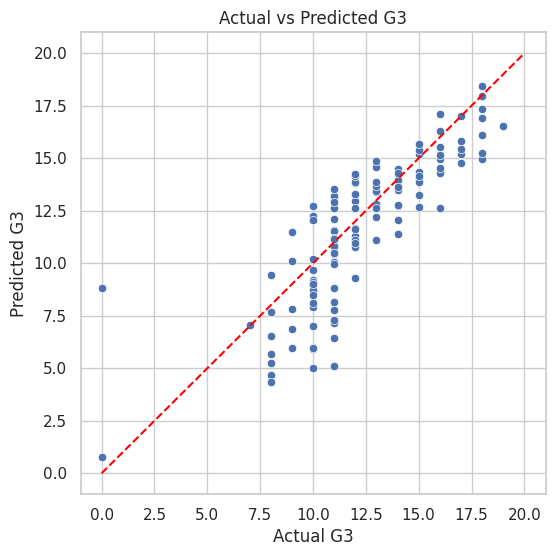

In [41]:
# Residuals plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted G3")
plt.plot([0, 20], [0, 20], color='red', linestyle='--')
plt.grid(True)
plt.show()

# **Train xgboost regressor**

In [43]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred)
r2_xgb = r2_score(y_test, y_pred)

print(f"XGBoost Regressor MSE: {mse_xgb:.2f}")
print(f"XGBoost Regressor R² Score: {r2_xgb:.2f}")

XGBoost Regressor MSE: 3.99
XGBoost Regressor R² Score: 0.59


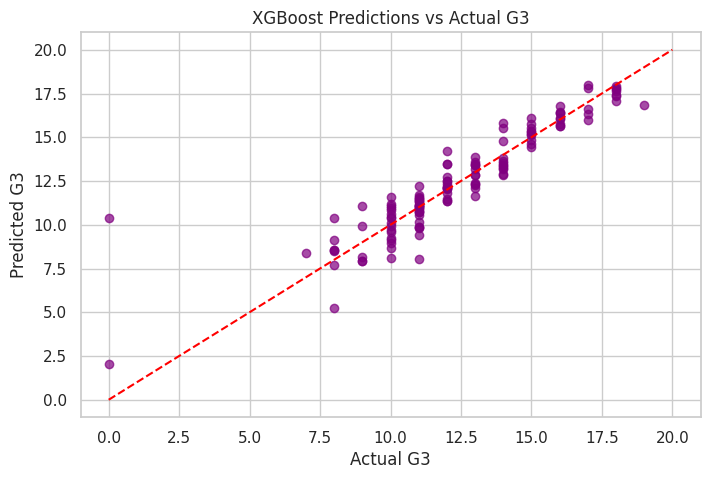

In [47]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, color="purple")
plt.plot([0, 20], [0, 20], color="red", linestyle="--")  # perfect prediction line
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("XGBoost Predictions vs Actual G3")
plt.grid(True)
plt.show()